#  2.  predicting turbine energy yield (TEY) using ambient variables as features.


In [20]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

In [21]:

seed = 7
np.random.seed(seed)
dataset= pd.read_csv('gas_turbines.csv')
dataset

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


<AxesSubplot:>

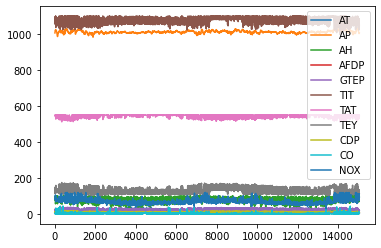

In [23]:
dataset.plot()

<AxesSubplot:>

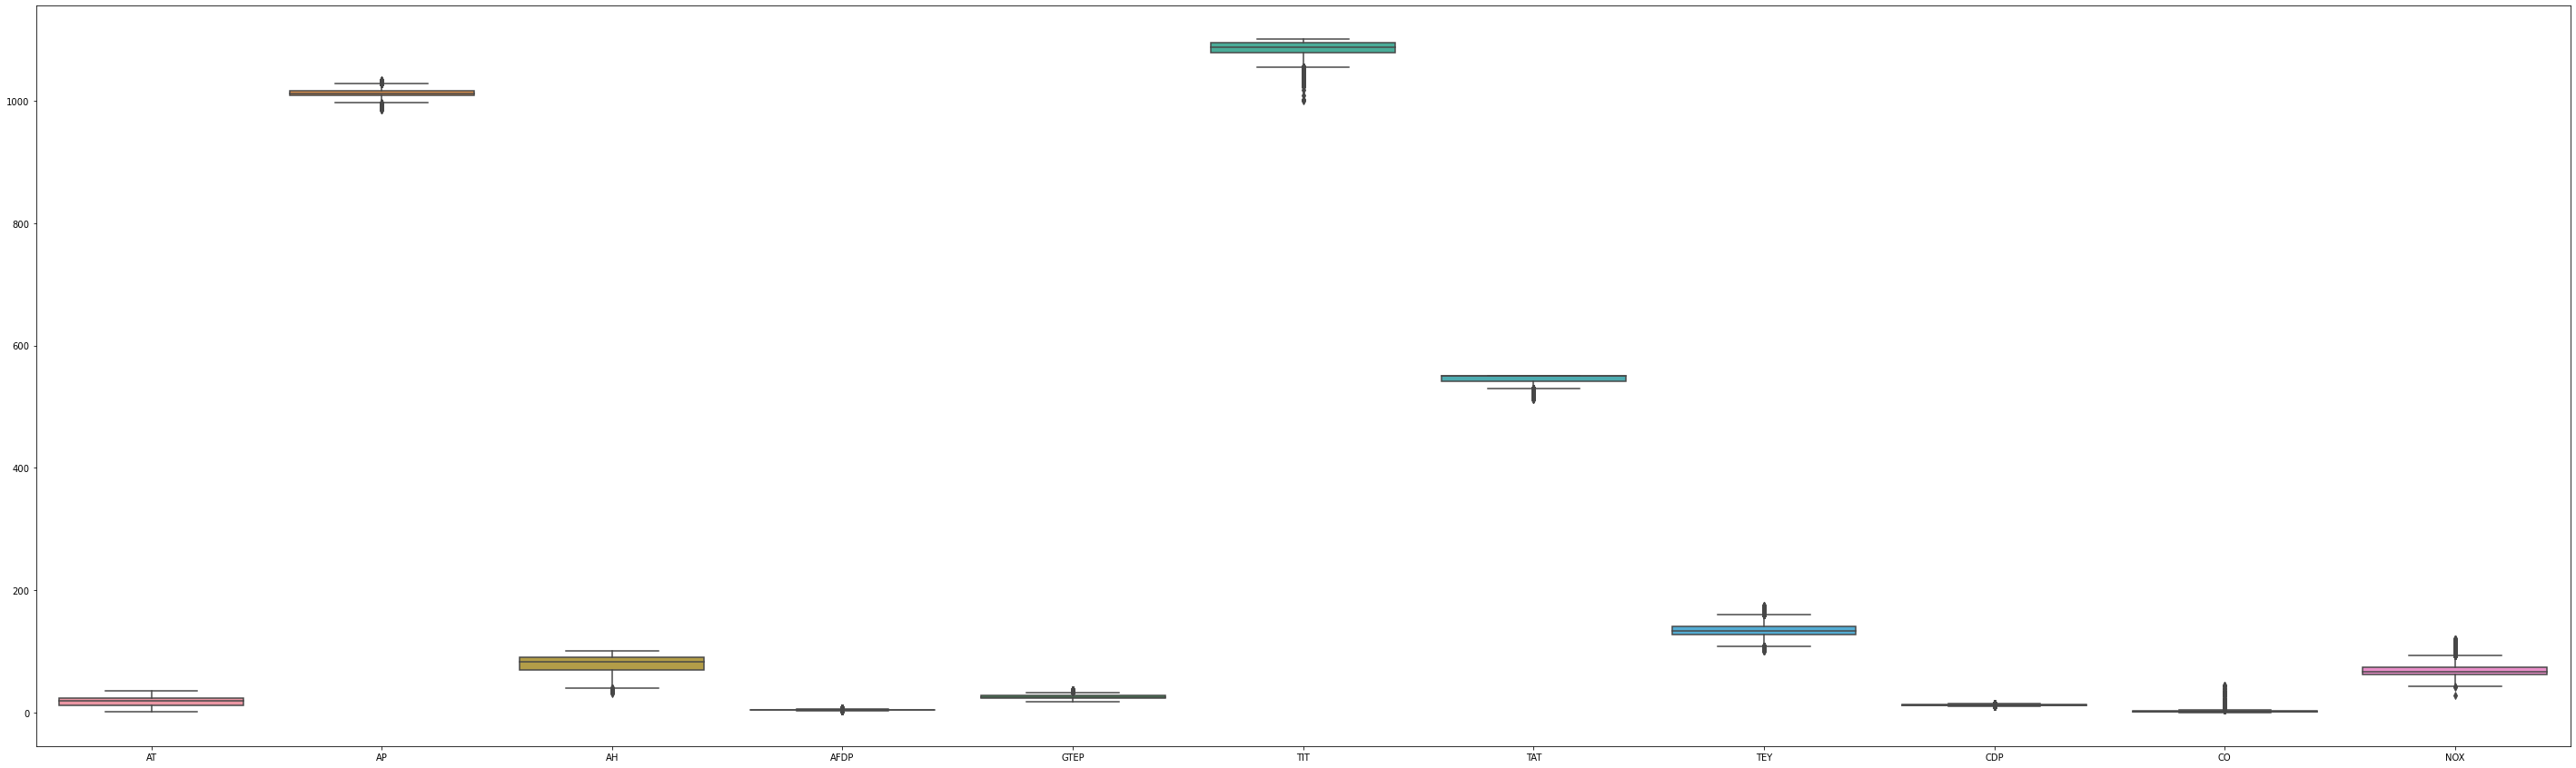

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(50,15))
sns.boxplot(data=dataset)

In [25]:
colnames = list(dataset.columns)
colnames

['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO', 'NOX']

In [26]:
df=dataset.drop(['TEY'],axis=1)
X=df
X

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [27]:
Y=dataset['TEY']
Y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [28]:
# create model
model = Sequential()
model.add(Dense(12,input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [29]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=10, batch_size=10)

Epoch 1/10
1008/1008 [==============================] - 3s 2ms/step - loss: -2202291.8186 - accuracy: 0.0000e+00 - val_loss: -34105932.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
1008/1008 [==============================] - 2s 2ms/step - loss: -71096992.1546 - accuracy: 0.0000e+00 - val_loss: -231757952.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
1008/1008 [==============================] - 2s 2ms/step - loss: -330797578.0059 - accuracy: 0.0000e+00 - val_loss: -664510976.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
1008/1008 [==============================] - 2s 2ms/step - loss: -844399749.0109 - accuracy: 0.0000e+00 - val_loss: -1367266304.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
1008/1008 [==============================] - 2s 2ms/step - loss: -1637136556.0198 - accuracy: 0.0000e+00 - val_loss: -2370500864.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
1008/1008 [==============================] - 1s 1ms/step - loss: -2758111638.4539 - accuracy: 0.0000e+00 - val_loss: -3699835136.0000 - val_

In [31]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 1s 1ms/step - loss: -13147474944.0000 - accuracy: 0.0000e+00
accuracy: 0.00%


In [32]:
#HYPERPARAMETERS TUNING
from sklearn.preprocessing import StandardScaler
# Standardization
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [33]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9
count,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04,1.503900e+04
mean,-1.169680e-15,-1.925280e-14,2.007245e-16,3.810001e-16,1.111478e-16,-2.324212e-15,1.744899e-15,2.542166e-16,1.959261e-17,-3.646853e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.276462e+00,-4.266288e+00,-3.536594e+00,-2.779497e+00,-1.806771e+00,-5.021933e+00,-4.188141e+00,-1.992416e+00,-8.874862e-01,-3.861033e+00
25%,-8.392292e-01,-6.706510e-01,-6.796337e-01,-6.266930e-01,-5.091458e-01,-2.540512e-01,-4.101146e-01,-4.354335e-01,-5.015202e-01,-6.578107e-01
50%,5.566605e-02,-6.227861e-02,2.277844e-01,-1.854065e-02,-8.075681e-02,2.965544e-01,5.712570e-01,-7.011925e-02,-2.620452e-01,-1.518527e-01
75%,8.051309e-01,5.772924e-01,7.916582e-01,4.612196e-01,4.228638e-01,7.382490e-01,5.928675e-01,4.311680e-01,8.455882e-02,5.486567e-01
max,2.266234e+00,3.275970e+00,1.528011e+00,4.486233e+00,2.871006e+00,1.028678e+00,6.627839e-01,2.700105e+00,1.895949e+01,4.937717e+00


In [34]:
#### Tuning of Hyperparameters :- Batch Size and Epochs
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [35]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [37]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10]
epochs = [10]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START batch_size=10, epochs=10....................................
[CV 1/5; 1/1] END ..................batch_size=10, epochs=10; total time=  15.1s
[CV 2/5; 1/1] START batch_size=10, epochs=10....................................
[CV 2/5; 1/1] END ..................batch_size=10, epochs=10; total time=  11.2s
[CV 3/5; 1/1] START batch_size=10, epochs=10....................................
[CV 3/5; 1/1] END ..................batch_size=10, epochs=10; total time=  10.8s
[CV 4/5; 1/1] START batch_size=10, epochs=10....................................
[CV 4/5; 1/1] END ..................batch_size=10, epochs=10; total time=  11.4s
[CV 5/5; 1/1] START batch_size=10, epochs=10....................................
[CV 5/5; 1/1] END ..................batch_size=10, epochs=10; total time=  11.4s


In [38]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'batch_size': 10, 'epochs': 10}
0.0,0.0 with: {'batch_size': 10, 'epochs': 10}


In [39]:
#### Tuning of Hyperparameters:- Learning rate and Drop out rate
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(4,input_dim = 10,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   4.3s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   3.8s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   4.3s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   4.0s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   4.4s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 2/9] END ......dropout_rate=0.0, learnin

In [40]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.0,0.0 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [41]:
#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=   4.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=   4.2s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=   4.3s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=   4.2s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=   4.8s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................
[CV 1/5; 2/12] END .activation_function=softmax,

[CV 1/5; 11/12] END .activation_function=linear, init=normal; total time=   3.3s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END .activation_function=linear, init=normal; total time=   3.9s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END .activation_function=linear, init=normal; total time=   3.3s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................
[CV 4/5; 11/12] END .activation_function=linear, init=normal; total time=   4.0s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................
[CV 5/5; 11/12] END .activation_function=linear, init=normal; total time=   5.5s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................
[CV 1/5; 12/12] END ...activation_function=linear, init=zero; total time=   4.6s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................
[CV 2/5; 12/12] END ...activ

In [42]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.00033255736343562603, using {'activation_function': 'linear', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'softmax', 'init': 'zero'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'relu', 'init': 'zero'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'tanh', 'init': 'zero'}
0.00033255736343562603,0.0006651147268712521 with: {'activation_function': 'linear', 'init': 'uniform'}
0.00033255736343562603,0.0006651147268712521 with: {'activation_function': 'linear', 'init': 'normal'}
0.0,0.0 with: {'activation_function': 'linear', 'init': 'zero'}


In [43]:
#### Tuning of Hyperparameter :-Number of Neurons in activation layer
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   3.6s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   3.6s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   4.1s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   3.7s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   3.8s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ......................neuron1=4

In [44]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.0, using {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 4, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 8, 'neuron2': 8}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 2}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 4}
0.0,0.0 with: {'neuron1': 16, 'neuron2': 8}


In [ ]:
# Hyperparameters all at once and this process will take more time 

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 10,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=  12.0s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=  11.6s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4

[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=  12.3s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=  14.5s
[CV 3/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=  16.4s
[CV 4/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 6/8748] END activation_fu